# $$Árvore~de~Decisão: Índice~Gini$$

### $$Conceito:$$


**Árvores de decisão (ou árvores de classificação)** são modelos de aprendizado supervisionado que representam regras de decisão baseadas nos valores dos atributos.


**Os atributos no topo da árvore** são os mais importantes para descrever o comportamento da variável Target, seguindo uma ordem de importância


Para construir uma **árvore de decisão usamos 2 formulas importantes: Entropia e Índice de Gini**, com elas você consegue descobrir quais variáveis são mais importantes para explicar a variável Target



**A construção de uma árvore de decisão tem três objetivos, quais sejam:**

- Diminuir a entropia (a aleatoriedade da variável objetivo)

- Ser consistente com o conjunto de dados (Treino e teste)

- Possuir o menor número de nós

### $$Terminologias~ relacionadas~ às ~árvores~ de~ decisão:$$


**Pruning:** 
- Eliminar alguns Nós da Árvore para evitar Overfitting


**Regra de Parada:**
- Os parâmetros usados para regra de parada são: Índice Gini, Qui-Quadrado, Ganho de Informação e Redução de Variância



**Tipo de Distribuição:**
- **Método não paramétrico:**  A  árvore  de  decisão  é  considerada  um  método  não-paramétrico. Isto significa que as árvores de decisão não pressupõem distribuição do espaço nem a estrutura do classificador


**Nó pai e nó filho:**

- Um nó que é dividido em sub-nós é chamado de nó pai (nó raiz). Os sub-nós são os nós filhos (nós subsequentes) do nó pai




### $$Entropia (Desordem):$$



Através da **entropia** é possível verificar a variação das classes dos dados na variável target. **Quanto maior a entropia, maior a desordem dos dados (dados balanceados), o intervalo de Entropia varia entre 0 e 1 para dados binários e maior que 1 em multiclasses**


Quanto mais **equilibrado os dados** estiverem na variável Target mais **distante do valor 0** a entropia vai estar


Para **diminuir a entropia** nos dados da **variável target**, temos que **adicionar variáveis explicativas** e **calcular seu ganho de informação**, a variável que tiver o maior valor do ganho de informação será o nó raiz e ficará no topo da árvore, seguindo a ordem até o nó folha que deixará os dados mais puro possível (Entropia 0 ou próxima de 0)



### $$Índice ~ Gini:$$

O **Objetivo do índice gini é selecionar as variáveis mais relevantes** para prever as features do modelo utilizando o algoritmo de árvore de decisão


Assim como na Entropia, será verificada a distribuição dos dados nas variáveis preditoras de acordo com a variação da variável target, A variável preditora com o **menor índice Gini** será a escolhida para o **nó principal** da árvore, o intervalo de Impureza Gini varia entre 0 e 0,5.


A **Impureza Gini** é calculada para **cada classe da variável explicativa**, quanto **menor** for o **valor, menor será o valor do índice gini**
 

**Obs:** Podem haver variáveis que tem o valor de gini alto, podendo ficar de fora da árvore




### $$Representando ~Árvores~ de~ Decisão:$$

- Cada nó interno (variável explicativa) testa um atributo (classe da variável explicativa)


- Cada ramo corresponde a um valor do atributo (classe da variável explicativa)


- Cada folha representa uma classe (variável Target)






__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  

## $$Classificar~corretamente~as~classes~da~variável~target$$$$usando~o~algoritimo~de~Árvore~de~decisão~com~o~criterio~gini$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Pacote
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Banco de dados 

In [2]:
# Carregando o dataset
dados = pd.read_csv('fraude.csv',encoding='latin1',sep=';')
dados.head(10)

,preco,horario,Classificacao
0,ate 3000,Noturno,Normal
1,ate 3000,Noturno,Normal
2,ate 3000,Noturno,Normal
3,ate 3000,Noturno,Normal
4,ate 3000,Noturno,Normal
5,ate 3000,Noturno,Normal
6,entre 3000 e 8000,Noturno,Fraude
7,entre 3000 e 8000,Noturno,Fraude
8,entre 3000 e 8000,Noturno,Fraude
9,entre 3000 e 8000,Noturno,Fraude


# Análise Exploratória

In [20]:
#Tipos de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   preco          38 non-null     object
 1   horario        38 non-null     object
 2   Classificacao  38 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


**Variáveis qualitativas, sem valores nulos**

# Cálculo do Índice Gini:

## 1° Passo: Calcular as probabilidade de cada classe da variável explicativa VS target:

### Variável Explicativa:  'preco'

In [4]:
#Dados da variável preco
dados.preco.value_counts().to_frame()

,preco
ate 3000,20
entre 3000 e 8000,18


**2 classes**

In [5]:
#Probabilidade da classe: (entre 3000 e 8000)

# Variavel preco (entre 3000 e 8000)
preco_3a8_ = dados.loc[(dados['preco'] =='entre 3000 e 8000')]

# Quantidade de vezes que a classe fraude aparece na variavel preço da classe 'entre 3000 e 8000'
preco_3a8_fraud = preco_3a8_[preco_3a8_.Classificacao=='Fraude']

# Quantidade de vezes que a classe Normal aparece na variavel preço da classe 'entre 3000 e 8000'
preco_3a8_norm = preco_3a8_[preco_3a8_.Classificacao=='Normal']

print(f'Total de amostras da variável preco entre 3000 e 8000 : {len(preco_3a8_)}')

print(f'\nNúmero de dados da variável preco entre 3000 e 8000 da classe target Fraude: {len(preco_3a8_fraud)}')
print(f'Número de dados da variável preco entre 3000 e 8000 da classe target Normal: {len(preco_3a8_norm)}')

Total de amostras da variável preco entre 3000 e 8000 : 18

Número de dados da variável preco entre 3000 e 8000 da classe target Fraude: 8
Número de dados da variável preco entre 3000 e 8000 da classe target Normal: 10


**Probabilidade de cada classe: 'entre 3000 e 8000' da variável explicativa: 'preco'  VS target ('Fraude','Normal')**

In [6]:
#Probabilidade da classe: (ate 3000)

# Variavel preco classe 'ate 3000' 
preco_3_ = dados.loc[(dados['preco'] =='ate 3000')]

# Quantidade de vezes que a classe fraude aparece na variavel preço da classe 'ate 3000'
preco_3_fraud = preco_3_[preco_3_.Classificacao=='Fraude']

# Quantidade de vezes que a classe Normal aparece na variavel preço da classe 'ate 3000'
preco_3_norm = preco_3_[preco_3_.Classificacao=='Normal']

print(f'Total de amostras da variável preco até 3000 : {len(preco_3_)}')

print(f'\nNúmero de dados da variável preco até 3000 da classe target Fraude: {len(preco_3_fraud)}')
print(f'Número de dados da variável preco até 3000 da classe target Normal: {len(preco_3_norm)}')

Total de amostras da variável preco até 3000 : 20

Número de dados da variável preco até 3000 da classe target Fraude: 0
Número de dados da variável preco até 3000 da classe target Normal: 20


**Probabilidade de cada classe: 'até 3000' da variável explicativa: 'preco'  VS target ('Fraude','Normal')**

In [7]:
#Indice Gini de cada classe (Calculo da impureza)

gini_preco_3a8_ = 1 - ((len(preco_3a8_fraud)/ len(preco_3a8_))**2 + (len(preco_3a8_norm)/len(preco_3a8_))**2)

gini_preco_3_ = 1 - ((len(preco_3_fraud)/ len(preco_3_))**2 + (len(preco_3_norm)/len(preco_3_))**2)

print(f'Índice Gini da variável preco da classe entre 3000 e 8000 : {gini_preco_3a8_}')

print(f'\nÍndice Gini da variável preco da classe até 3000 : {gini_preco_3_}')

Índice Gini da variável preco da classe entre 3000 e 8000 : 0.49382716049382713

Índice Gini da variável preco da classe até 3000 : 0.0


**Cálculo da impureza de cada classe da variável: 'preco'**

In [8]:
#Indice Gini da variável 'preco'

ig_preco = ((len(preco_3a8_)/len(dados)) * gini_preco_3a8_) + ((len(preco_3_)/len(dados)) * gini_preco_3_)

print(f'Índice Gini da variável preco: {ig_preco}')

Índice Gini da variável preco: 0.23391812865497075


**Cálculo do Índice Gini da variável: 'preco'**

**Obs: Quanto menor o valor do índice gini, mais homogêneo será os dados**

### Variável Explicativa: 'horario'

In [9]:
#Dados da variável horario
dados.horario.value_counts().to_frame()

,horario
Noturno,19
Diurno,19


**2 classes**

In [10]:
#Probabilidade da classe: (Noturno)

# Variavel horario (Noturno)
horario_noturno_ = dados.loc[(dados['horario'] =='Noturno')]

# Quantidade de vezes que a classe fraude aparece na variavel horario da classe 'Noturno'
horario_noturno_fraud = horario_noturno_[horario_noturno_.Classificacao=='Fraude']

# Quantidade de vezes que a classe Normal aparece na variavel horario da classe 'Noturno
horario_noturno_norm = horario_noturno_[horario_noturno_.Classificacao=='Normal']


print(f'Total de amostras da variável horario período Noturno : {len(horario_noturno_)}')

print(f'\nNúmero de dados da variável horario período Noturno da classe target Fraude: {len(horario_noturno_fraud)}')
print(f'\nNúmero de dados da variável horario período Noturno da classe target Normal: {len(horario_noturno_norm)}')

Total de amostras da variável horario período Noturno : 19

Número de dados da variável horario período Noturno da classe target Fraude: 8

Número de dados da variável horario período Noturno da classe target Normal: 11


**Probabilidade de cada classe: 'Noturno' da variável explicativa: 'horario'  VS target ('Fraude','Normal')**

In [11]:
#Probabilidade da classe: (Diurno)

# Variavel horario (Diurno)
horario_Diurno_ = dados.loc[(dados['horario'] =='Diurno')]


# Quantidade de vezes que a classe fraude aparece na variavel horario da classe 'Diurno'
Diurno_fraud = horario_Diurno_[horario_Diurno_.Classificacao=='Fraude']

# Quantidade de vezes que a classe Normal aparece na variavel horario da classe 'Diurno'
Diurno_norm = horario_Diurno_[horario_Diurno_.Classificacao=='Normal']

print(f'Total de amostras da variável horario período Diurno : {len(horario_Diurno_)}')

print(f'\nNúmero de dados da variável horario período Diurno da classe target Fraude: {len(Diurno_fraud)}')
print(f'\nNúmero de dados da variável horario período Diurno da classe target Normal: {len(Diurno_norm)}')


Total de amostras da variável horario período Diurno : 19

Número de dados da variável horario período Diurno da classe target Fraude: 0

Número de dados da variável horario período Diurno da classe target Normal: 19


**Probabilidade de cada classe: 'Diurno' da variável explicativa: 'horario'  VS target ('Fraude','Normal')**

In [12]:
#Indice Gini de cada classe (Calculo da impureza)

gini_noturno_ = 1-((len(horario_noturno_fraud)/len(horario_noturno_))**2 + (len(horario_noturno_norm)/len(horario_noturno_))**2)

gini_Diurno_ = 1 - ((len(Diurno_fraud)/ len(horario_Diurno_))**2 + (len(Diurno_norm)/len(horario_Diurno_))**2)

print(f'Índice Gini da variável horario da classe Noturno : {gini_noturno_}')

print(f'\nÍndice Gini da variável horario da classe Diurno : {gini_Diurno_}')

Índice Gini da variável horario da classe Noturno : 0.48753462603878117

Índice Gini da variável horario da classe Diurno : 0.0


**Cálculo da impureza de cada classe da variável: 'horario '**

In [13]:
#Indice Gini da variável 'horario'

ig_horario = ((len(horario_noturno_)/len(dados)) * gini_noturno_) + ((len(horario_Diurno_)/len(dados)) * gini_Diurno_)

print(f'Índice Gini da variável horario: {ig_horario}')

Índice Gini da variável horario: 0.24376731301939059


**Cálculo do Índice Gini da variável: 'horario'**

In [14]:
#Escolha do nó raiz atráves do menor índice gini
ig = {'preco':ig_preco,'horaio':ig_horario}

gini = pd.DataFrame(list(ig.items()),columns=['Variavel','Índice Gini'])
gini = gini.set_index('Variavel')
gini

,Índice Gini
Variavel,
preco,0.233918
horaio,0.243767


**Observe que a variável com o menor indice gini é: 'preço', portanto essa variável será o nó raiz da árvore**

## Índice Gini utilizando o algoritmo DecisionTreeClassifier

In [15]:
# Dataset
dados.head()

,preco,horario,Classificacao
0,ate 3000,Noturno,Normal
1,ate 3000,Noturno,Normal
2,ate 3000,Noturno,Normal
3,ate 3000,Noturno,Normal
4,ate 3000,Noturno,Normal


## Transformar as variáveis categóricas em dummys

- A maioria dos algoritmos de Machine Learning não conseguem lidar com variáveis categóricas, então precisamos transformar tais variáveis em números (Dummies)

In [16]:
#Dummies
preco = pd.get_dummies(dados['preco'])
preco.columns = ['ate_3000','mais_3000']
horario = pd.get_dummies(dados['horario'])
horario.columns = ['Diurno','Noturno']
x = preco.join(horario)
x.head()

,ate_3000,mais_3000,Diurno,Noturno
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


**Variáveis explicativas transformadas em dummies**

In [17]:
#Separar os dados em x e y
x
y = dados.iloc[:,2]


## Modelagem

In [18]:
#Modelagem dos dados
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')
modelo = clf.fit(x,y)

#Acuracia do modelo
acuracia = modelo.score(x,y)
print(f'Acurácia do Modelo = {round(acuracia*100,2)}%')


Acurácia do Modelo = 97.37%


**Usando o índice gini como critério de decisão, conseguimos uma acurácia de 97.37% na base de dados**

## Visualizar a árvore de decisão Completa através do gráfico

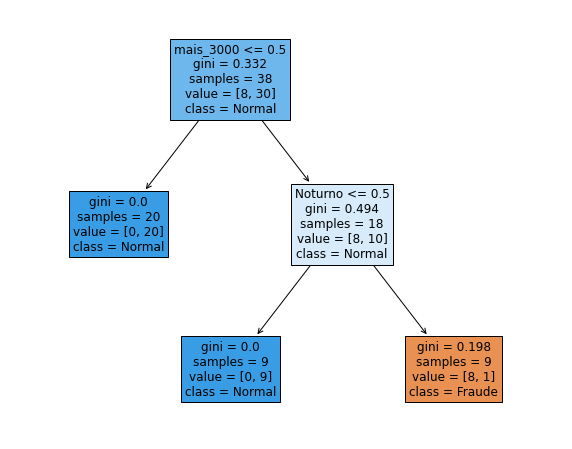

In [19]:
#Plot
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(10,8))
plot_tree(modelo, feature_names=x.columns, fontsize=12,filled=True,class_names=['Fraude', 'Normal']);


**Figura mostra assim como no cálculo da impureza do índice Gini que os dados não são 100% puros, porém apenas 1 dado ficou sem ser explicado**

**Podemos observamos graficamente que quando o preço for menor do que 3000 mil não haverá fraude**

# Conclusão:

**O algoritmo de árvore de decisão é uma das formas mais rápidas de identificar as variáveis mais significativas para o modelo, temos alguns parâmetros que podemos usar para alcançar o objetivo. O índice gini é um dos critérios mais importante para a construção da árvore de decisão, pois com ele conseguimos construir a árvore de acordo com as variáveis mais importante para então conseguir classificar o modelo corretamente**

**A representação gráfica de uma árvore de decisão é muito intuitiva e torna o problema fácil de compreender, mesmo para pessoas que não tenham perfil analítico**